this notebook runs on a different environment to run shap "env"

In [2]:
import numpy as np
import pandas as pd

In [3]:
# imports 4

from xgboost import XGBClassifier

import joblib

In [4]:
X_path = "../data/processed/X_red_new_train.csv"
y_path  = "../data/processed/y_red_new_train.csv"


X = pd.read_csv(X_path)
y = pd.read_csv(y_path)

In [5]:
model_xgbc_01 = XGBClassifier(learning_rate=1.0, max_depth=5, min_child_weight=8, n_estimators=100, n_jobs=1, subsample=0.8500000000000001, verbosity=0)
# Fix random state in exported estimator
if hasattr(model_xgbc_01, 'random_state'):
    setattr(model_xgbc_01, 'random_state', 42)

model_xgbc_01.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1.0, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=8, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=1,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [6]:
columnas = X.columns

In [19]:
dic_columnas = {key : value for key, value in zip(range(len(columnas)), columnas)}
dic_columnas

{0: 'Received Packets',
 1: 'Received Bytes',
 2: 'Sent Bytes',
 3: 'Sent Packets',
 4: 'Port alive Duration (S)',
 5: 'Delta Received Packets',
 6: 'Delta Received Bytes',
 7: 'Delta Sent Bytes',
 8: 'Delta Sent Packets',
 9: 'Total Load/Rate',
 10: 'Total Load/Latest',
 11: 'Unknown Load/Rate',
 12: 'Unknown Load/Latest',
 13: 'Latest bytes counter',
 14: 'Packets Looked Up',
 15: 'Packets Matched'}

In [8]:
columnas

Index(['Received Packets', 'Received Bytes', 'Sent Bytes', 'Sent Packets',
       'Port alive Duration (S)', 'Delta Received Packets',
       'Delta Received Bytes', 'Delta Sent Bytes', 'Delta Sent Packets',
       'Total Load/Rate', 'Total Load/Latest', 'Unknown Load/Rate',
       'Unknown Load/Latest', 'Latest bytes counter', 'Packets Looked Up',
       'Packets Matched'],
      dtype='object')

In [9]:
sample_data_name = "../data/processed/X_red_new_test.csv"
labels_data_name  = "../data/processed/y_red_new_test.csv"


samples01 = pd.read_csv(sample_data_name)
labels01 = pd.read_csv(labels_data_name)

In [10]:
model_name = "../deplo-docker/src/model_xgbc_01.joblib"
model = joblib.load(model_name)


[19:02:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.



In [11]:
import shap


In [12]:
explainer = shap.TreeExplainer(model_xgbc_01)
shap_values = explainer.shap_values(samples01)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [13]:
explainer.expected_value

[1.0112498, 0.8804286, 0.59835225, -4.0414906, -1.0815367, 1.0846181]

In [14]:
results_dict = {key : value for key, value in zip([1 , 2, 3, 4, 5, 0], ['Blackhole', 'Diversion', 'Normal', 'Overflow', 'PortScan', 'TCP-SYN'])}
results_dict

{1: 'Blackhole',
 2: 'Diversion',
 3: 'Normal',
 4: 'Overflow',
 5: 'PortScan',
 0: 'TCP-SYN'}

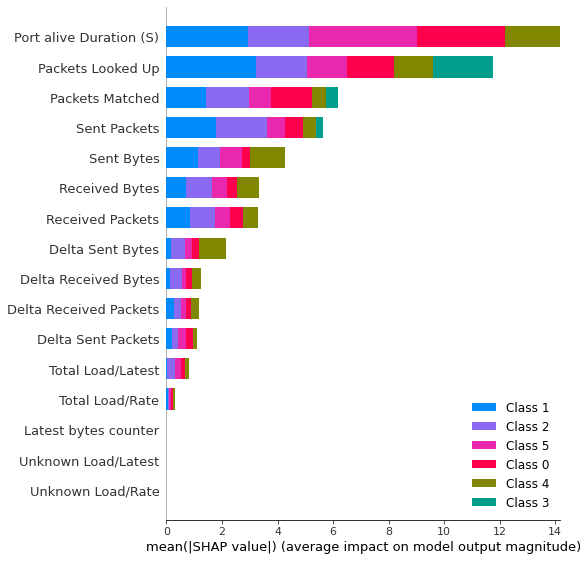

In [15]:
shap.summary_plot(shap_values, samples01, plot_type='bar', )

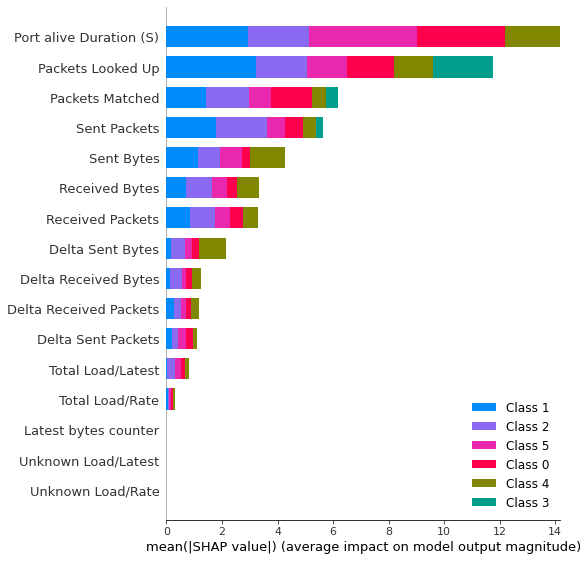

In [16]:
shap.summary_plot(shap_values, samples01, plot_type='bar')

     Received Packets  Received Bytes  Sent Bytes  Sent Packets  \
509              1368          184791     6502864          1719   

     Port alive Duration (S)  Delta Received Packets  Delta Received Bytes  \
509                     2022                       2                   278   

     Delta Sent Bytes  Delta Sent Packets  Total Load/Rate  Total Load/Latest  \
509               280                   2                0                  0   

     Unknown Load/Rate  Unknown Load/Latest  Latest bytes counter  \
509                  0                    0                     0   

     Packets Looked Up  Packets Matched  
509              12773            12647   [[1]]


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


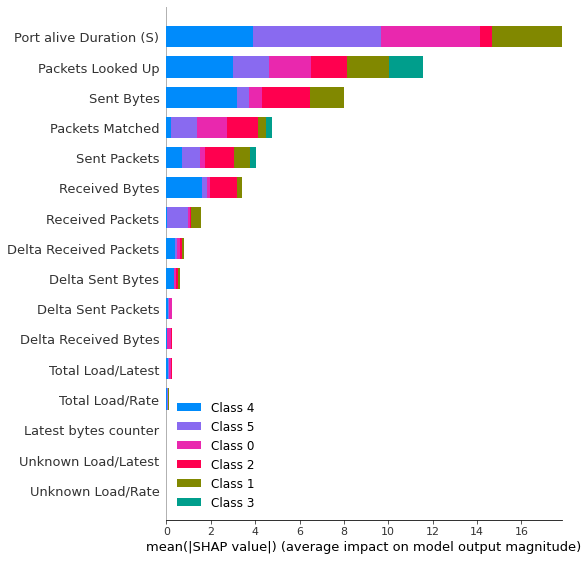

In [20]:
# now for a single sample

id = 509
sample_1 = samples01.iloc[[id]]
label_1 = labels01.iloc[[id]].values
print(sample_1, label_1)
shap_values_1 = explainer.shap_values(samples01.iloc[[id]])
shap.summary_plot(shap_values_1, samples01.iloc[[id]], plot_type='bar')

In [18]:
shap.initjs()


In [21]:
from shap import KernelExplainer


In [22]:
masker = shap.maskers.Independent(samples01, 100)
ke = KernelExplainer(model_xgbc_01.predict_proba, data=masker.data)
ke.expected_value

shap_values=ke.shap_values(masker.data)
shap.force_plot(ke.expected_value[0], shap_values[0][0])

  0%|          | 0/100 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [23]:
shap.force_plot(ke.expected_value[1], shap_values[1][0])

In [24]:
ids = 2
shap.force_plot(ke.expected_value[ids], shap_values[ids][0])

In [25]:
ids = 3
shap.force_plot(ke.expected_value[ids], shap_values[ids][0])

In [26]:
ids = 4
shap.force_plot(ke.expected_value[ids], shap_values[ids][0])

In [27]:
ids = 5
shap.force_plot(ke.expected_value[ids], shap_values[ids][0])

In [62]:
dic_columnas

{0: 'Received Packets',
 1: 'Received Bytes',
 2: 'Sent Bytes',
 3: 'Sent Packets',
 4: 'Port alive Duration (S)',
 5: 'Delta Received Packets',
 6: 'Delta Received Bytes',
 7: 'Delta Sent Bytes',
 8: 'Delta Sent Packets',
 9: 'Total Load/Rate',
 10: 'Total Load/Latest',
 11: 'Unknown Load/Rate',
 12: 'Unknown Load/Latest',
 13: 'Latest bytes counter',
 14: 'Packets Looked Up',
 15: 'Packets Matched'}

In [60]:
results_dict

{1: 'Blackhole',
 2: 'Diversion',
 3: 'Normal',
 4: 'Overflow',
 5: 'PortScan',
 0: 'TCP-SYN'}

In [28]:
import matplotlib.pyplot as plt

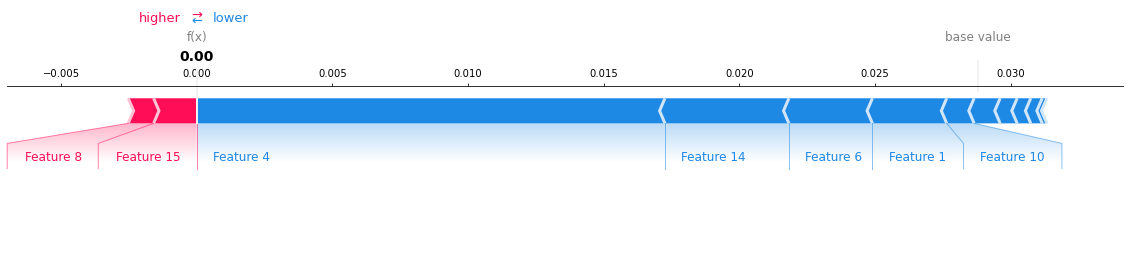

In [31]:
ids = 4

shap.force_plot(ke.expected_value[ids], shap_values[ids][0], matplotlib=True)
# plt.savefig('grafic5.png')